# Iris dataset visualization

Trying out non-ROOT plotting, jupyter notebooks, pandas...

First some boilerplate imports:

In [45]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

import os
import glob

import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

Create a pandas dataframe and look at general properties...

In [46]:
iris = pd.read_csv('bezdekIris.data', names = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
#dir(iris)
iris.head(3)

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [47]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepalLength    150 non-null float64
sepalWidth     150 non-null float64
petalLength    150 non-null float64
petalWidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [49]:
iris.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


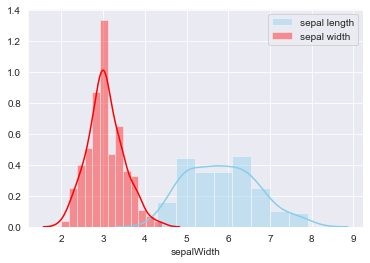

In [50]:
sns.set_style('darkgrid')
#plt.hist([iris.sepalLength, iris.petalLength], stacked = True, normed = True)
sns.distplot(iris.sepalLength, color = 'skyblue', label = 'sepal length')
sns.distplot(iris.sepalWidth, color = 'red', label = 'sepal width')
plt.legend()

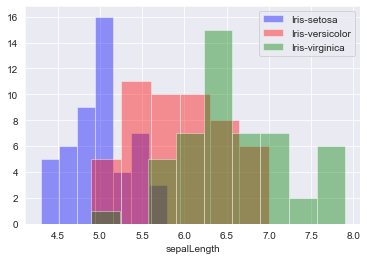

In [69]:
sns.distplot(iris[iris['class'] == 'Iris-setosa']['sepalLength'], color = 'blue', kde = False, label = 'Iris-setosa')
sns.distplot(iris[iris['class'] == 'Iris-versicolor']['sepalLength'], color = 'red', kde = False, label = 'Iris-versicolor')
sns.distplot(iris[iris['class'] == 'Iris-virginica']['sepalLength'], color = 'green', kde = False, label = 'Iris-virginica')
plt.legend()

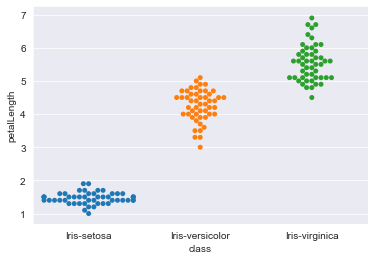

In [51]:
sns.swarmplot(data = iris, x = 'class', y = 'petalLength')

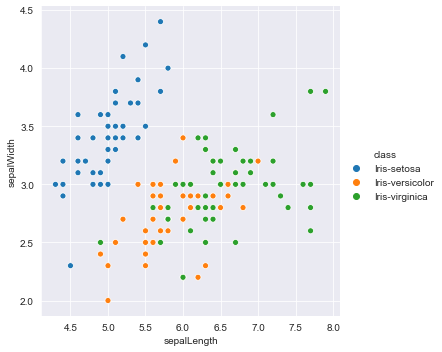

In [52]:
sns.relplot(data = iris, x = 'sepalLength', y = 'sepalWidth', hue = 'class')

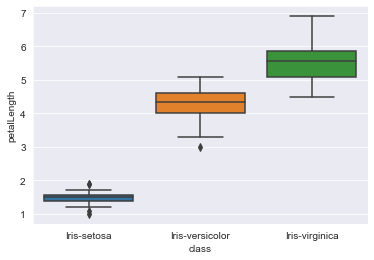

In [53]:
ax = sns.boxplot(data=iris, x = 'class',y = 'petalLength')

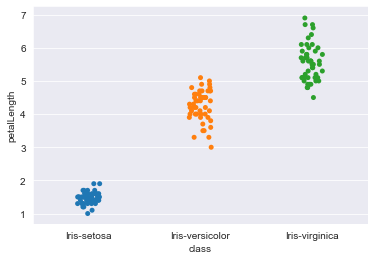

In [54]:
ax = sns.stripplot(data=iris, x= 'class', y='petalLength', jitter=True, edgecolor='green')

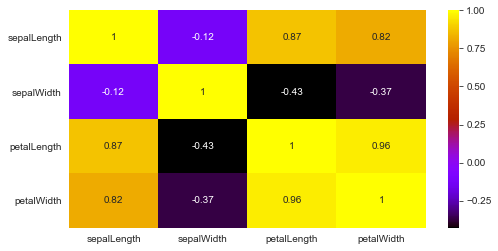

In [55]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='gnuplot')
#            cmap=sns.color_palette('colorblind', 10))
plt.show()

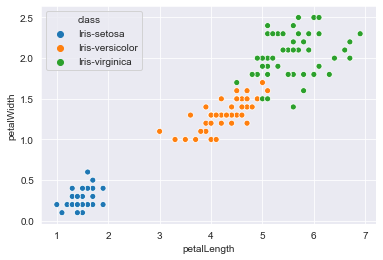

In [56]:
sns.scatterplot(data = iris, x = 'petalLength', y = 'petalWidth', hue = 'class')

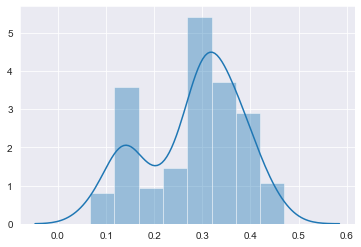

In [73]:
sns.distplot(iris['petalWidth'] / iris['petalLength'])

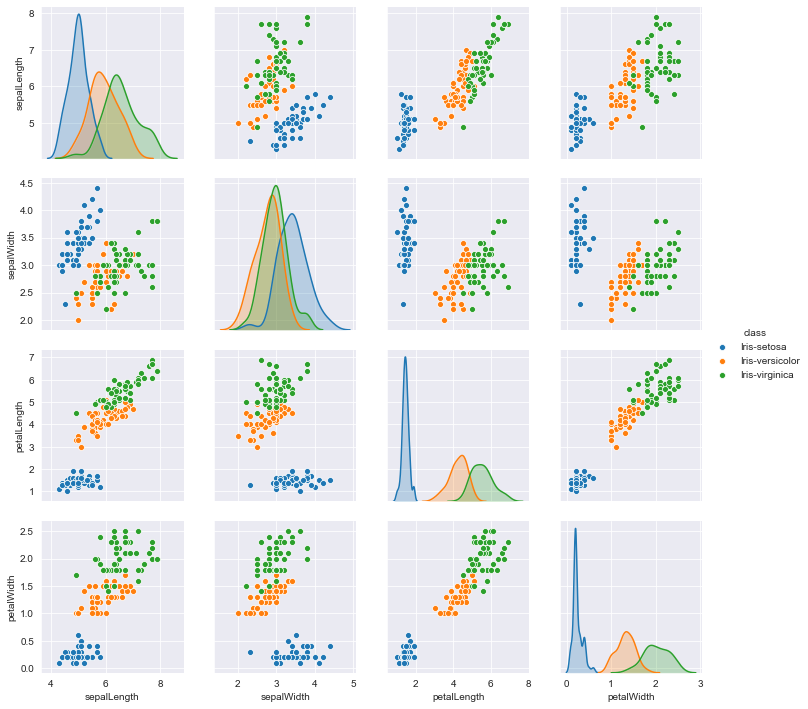

In [57]:
sns.pairplot(iris, hue = 'class')

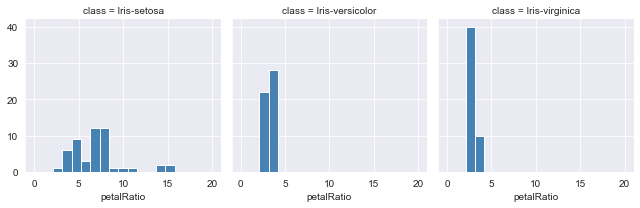

In [58]:
iris['petalRatio'] = iris.apply(lambda x : x.petalLength / x.petalWidth if x.petalWidth > 0 else -1, axis = 1)
sns.FacetGrid(iris, col = 'class').map(plt.hist, "petalRatio", color="steelblue", bins=np.linspace(0, 20, 20))

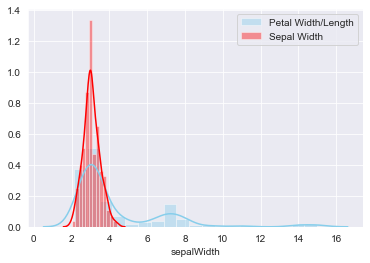

In [59]:
sns.distplot( iris["petalRatio"] , color="skyblue", label="Petal Width/Length")
sns.distplot( iris["sepalWidth"] , color="red", label="Sepal Width")
plt.legend()